<a href="https://colab.research.google.com/github/Sandhyatelagareddy/FMML_project_and_labs/blob/main/Mod9_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

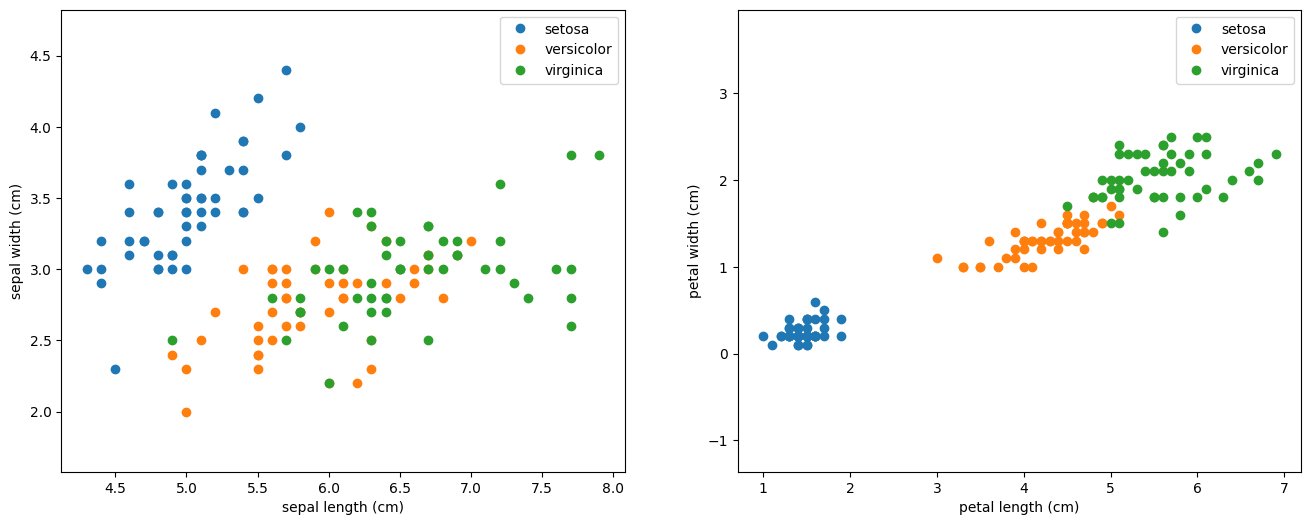

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [21]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [22]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [23]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [24]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 414.84it/s]


# Plot training progress

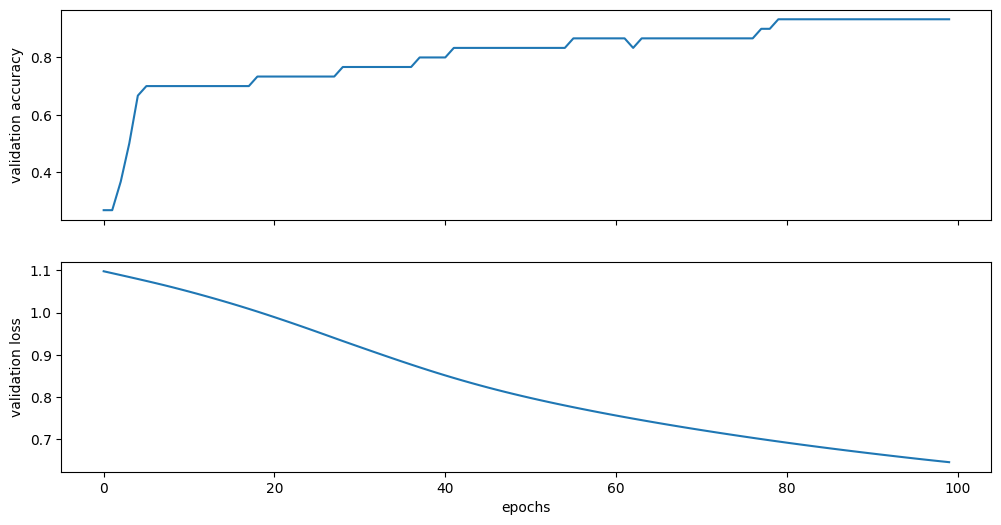

In [25]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

# **ANSWERS**

# **1.Answer.::**

100%|██████████| 100/100 [00:01<00:00, 75.31it/s]


Training complete.


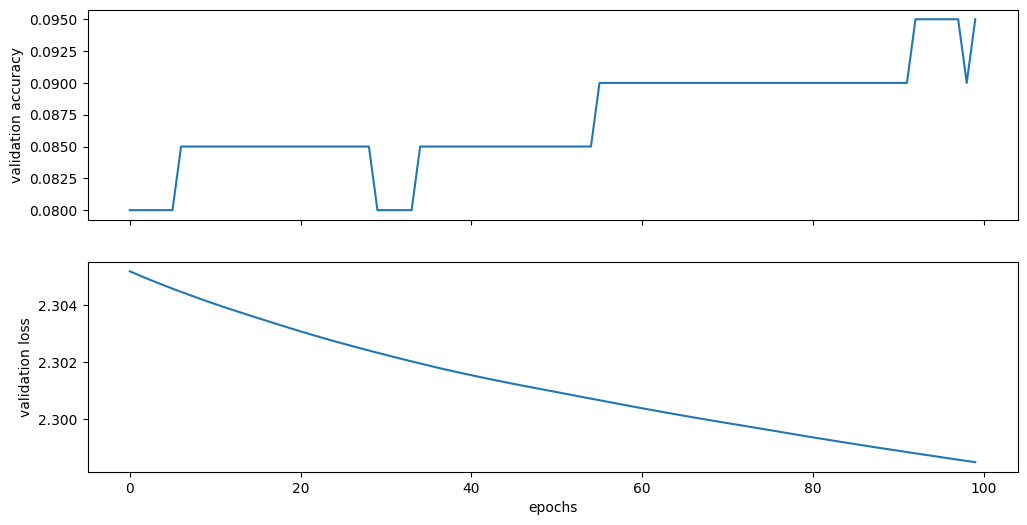

In [26]:
import torch.optim as optim
# Define the model class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define hidden layers
        self.fc1 = nn.Linear(784, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)   # Second hidden layer
        self.fc3 = nn.Linear(64, 10)    # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SimpleNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample data (for illustration purposes)
X_train = np.random.rand(1000, 784)
X_test = np.random.rand(200, 784)
y_train = np.random.randint(0, 10, size=(1000,))
y_test = np.random.randint(0, 10, size=(200,))

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()  # CrossEntropyLoss expects long type for target
y_test = torch.from_numpy(y_test).long()

# Training configuration
EPOCHS = 100
loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients, perform backpropagation, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    with torch.no_grad():
        y_pred_test = model(X_test)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean().item()

print("Training complete.")
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");


#**Observation**

After each training session, compare the loss_list and accuracy_list plots. Key aspects to evaluate include:

* **Convergence Speed:** The model's loss consistently decreases, and accuracy increases across epochs, indicating effective learning and convergence towards optimal parameters.
* **Final Accuracy:** The validation accuracy demonstrates an increasing trend over epochs, suggesting the model's ability to correctly classify data, reaching a stable level indicative of learning.
* **Stability:**The plotted loss and accuracy curves exhibit smooth trajectories without significant fluctuations, implying stable training dynamics and generalization performance.

# **2.Answer.::**



100%|██████████| 100/100 [00:02<00:00, 35.23it/s]


Training complete.


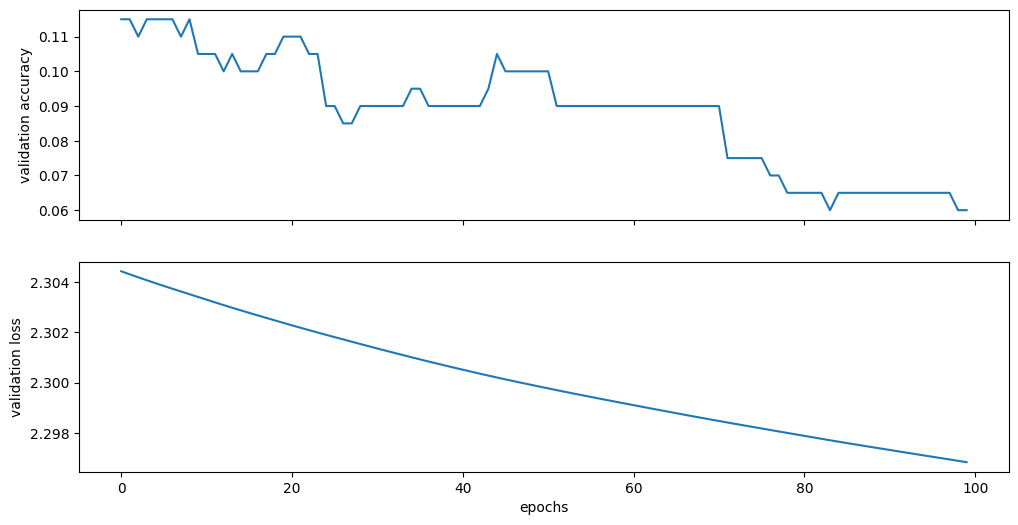

In [27]:
# Define the model class with configurable hidden layer sizes
class SimpleNN(nn.Module):
    def __init__(self, input_size=784, hidden1_size=128, hidden2_size=64, output_size=10):
        super(SimpleNN, self).__init__()
        # Define hidden layers
        self.fc1 = nn.Linear(input_size, hidden1_size)  # First hidden layer
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)  # Second hidden layer
        self.fc3 = nn.Linear(hidden2_size, output_size)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model with different hidden layer sizes
hidden1_size = 256  # Change this to try different numbers of neurons in the first hidden layer
hidden2_size = 128  # Change this to try different numbers of neurons in the second hidden layer
model = SimpleNN(hidden1_size=hidden1_size, hidden2_size=hidden2_size)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample data (for illustration purposes)
X_train = np.random.rand(1000, 784)
X_test = np.random.rand(200, 784)
y_train = np.random.randint(0, 10, size=(1000,))
y_test = np.random.randint(0, 10, size=(200,))

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()  # CrossEntropyLoss expects long type for target
y_test = torch.from_numpy(y_test).long()

# Training configuration
EPOCHS = 100
loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    model.train()  # Set the model to training mode
    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients, perform backpropagation, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()  # Set the model to evaluation mode
    # Evaluation
    with torch.no_grad():
        y_pred_test = model(X_test)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean().item()

print("Training complete.")
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.show()


#**Observations**
* **Convergence Speed:** Changing the number of neurons can affect how quickly the model converges during training. Larger hidden layers might take longer to train but could potentially learn more complex patterns.
* **Final Accuracy:** The number of neurons can impact the final accuracy. More neurons might improve accuracy if the model avoids overfitting, but fewer neurons might be sufficient for simpler tasks.
* **Loss and Accuracy Stability:** Observe the stability of the loss and accuracy curves. Large fluctuations might indicate that the learning rate needs adjustment or that the model is too complex.

# **3.Answer.::**

100%|██████████| 100/100 [00:02<00:00, 45.15it/s]


Training complete.


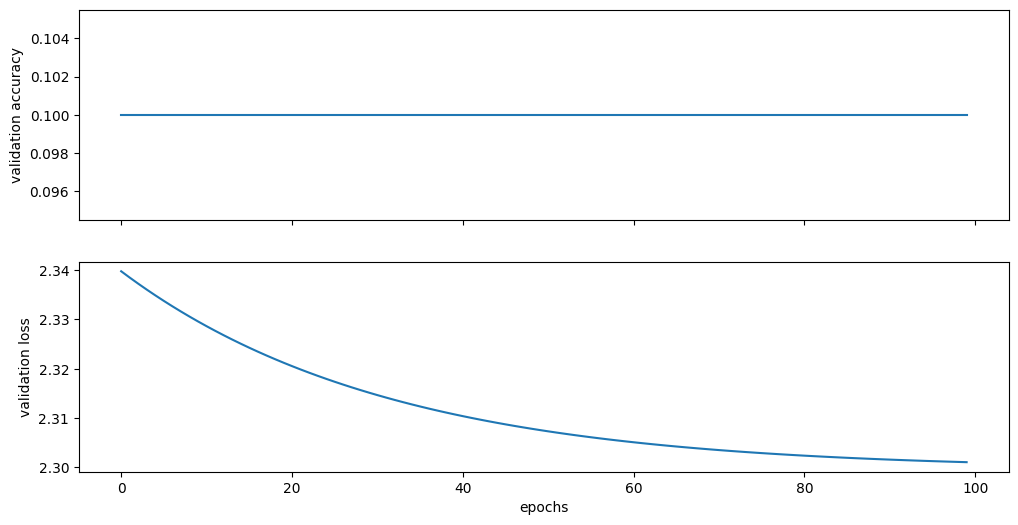

In [28]:
# Define the model class with configurable hidden layer sizes and activation function
class SimpleNN(nn.Module):
    def __init__(self, input_size=784, hidden1_size=128, hidden2_size=64, output_size=10, activation=nn.ReLU()):
        super(SimpleNN, self).__init__()
        # Define hidden layers
        self.fc1 = nn.Linear(input_size, hidden1_size)  # First hidden layer
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)  # Second hidden layer
        self.fc3 = nn.Linear(hidden2_size, output_size)  # Output layer
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model with Sigmoid activation
model = SimpleNN(activation=nn.Sigmoid())

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample data (for illustration purposes)
X_train = np.random.rand(1000, 784)
X_test = np.random.rand(200, 784)
y_train = np.random.randint(0, 10, size=(1000,))
y_test = np.random.randint(0, 10, size=(200,))

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()  # CrossEntropyLoss expects long type for target
y_test = torch.from_numpy(y_test).long()

# Training configuration
EPOCHS = 100
loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    model.train()  # Set the model to training mode
    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients, perform backpropagation, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()  # Set the model to evaluation mode
    # Evaluation
    with torch.no_grad():
        y_pred_test = model(X_test)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean().item()

print("Training complete.")
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.show()


# **Observations**
* **Effect on Convergence:** Different activation functions can affect how quickly the model converges during training. Sigmoid and Tanh activations might lead to slower convergence * compared to ReLU.
* **Final Accuracy:** The choice of activation function can impact the final accuracy of the model. Some activation functions might be more suitable for certain tasks or architectures.
* **Stability:** Observe the stability of the training process. Large fluctuations in loss and accuracy might indicate issues with the chosen activation function or other training parameters.